# Fashion-MNIST Classification using K-Means and Logistic Regression


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


## Importing Required Libraries

In this cell, we import the necessary libraries for:
- Data handling (`pandas`, `numpy`)
- Data visualization (`matplotlib`, `seaborn`)

These libraries will be used throughout the notebook for data loading,
exploration, and visualization.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading the Dataset

Here, the Fashion-MNIST training and testing datasets are loaded from CSV files.
Each row represents one image, where:
- The `label` column contains the class label
- The remaining columns represent pixel values

The first few rows of the training dataset are displayed to inspect the data structure.


In [9]:
train_path = r"/kaggle/input/fashionmnist/fashion-mnist_train.csv"
test_path = r"/kaggle/input/fashionmnist/fashion-mnist_test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
display(df_train.head(5))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Class Distribution in the Training Set

This cell shows the number of samples for each class label in the training dataset.
It helps verify whether the dataset is balanced across different fashion categories.


In [10]:
print(f"Shape of training data :{df_train.shape}\nShape of testing data :{df_test.shape}")

Shape of training data :(60000, 785)
Shape of testing data :(10000, 785)


## Class Distribution

This cell displays the number of samples for each class label in the training dataset.
It is used to check whether the dataset is balanced across all fashion categories.


In [11]:
df_train['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

This shows that the dataset is balanced across all classes.

## Statistical Summary of the Training Data

This cell provides a statistical summary of the training dataset,
including measures such as mean, standard deviation, and value ranges
for each feature.


In [12]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Statistical Summary of the Test Data

This cell shows the same statistical information as the training data,
but for the test dataset.


In [13]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


## Selecting Target Classes

In this cell, the class names are defined, and a subset of classes is selected
for the classification task.  
Only the chosen classes will be used in the subsequent steps of the project.


In [14]:
# Define the class names list
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# the classes that we will keep 
CLASSES_TO_KEEP = [1, 3, 5, 6, 8]

for class_id in CLASSES_TO_KEEP:
    print(f"ID {class_id}: {class_names[class_id]}")

ID 1: Trouser
ID 3: Dress
ID 5: Sandal
ID 6: Shirt
ID 8: Bag


## Filtering the Dataset by Selected Classes

In this step, the training and testing datasets are filtered to keep
only the selected classes.  
This reduces the classification problem to a subset of fashion categories
and ensures consistency between the training and testing data.


In [15]:
# Filter the Training DataFrame
train_mask = df_train['label'].isin(CLASSES_TO_KEEP)

df_train_filtered = df_train[train_mask].copy() 

# Filter the Testing DataFrame
test_mask = df_test['label'].isin(CLASSES_TO_KEEP)
df_test_filtered = df_test[test_mask].copy()

# Verify the Results 
print("--------------------------------------------------")
print(f"Original Training Rows: {len(df_train)}")
print(f"Filtered Training Rows (5 classes): {len(df_train_filtered)}")
print(f"Filtered Training Classes: {df_train_filtered['label'].unique()}")
print("-" * 50)
print(f"Original Testing Rows: {len(df_test)}")
print(f"Filtered Testing Rows (5 classes): {len(df_test_filtered)}")
print(f"Filtered Testing Classes: {df_test_filtered['label'].unique()}")

--------------------------------------------------
Original Training Rows: 60000
Filtered Training Rows (5 classes): 30000
Filtered Training Classes: [6 3 5 8 1]
--------------------------------------------------
Original Testing Rows: 10000
Filtered Testing Rows (5 classes): 5000
Filtered Testing Classes: [1 3 8 6 5]


## Label Distribution of the Filtered Dataset

This cell visualizes the distribution of the selected class labels
in the filtered training dataset.  
The bar chart helps confirm that the retained classes are evenly
represented after filtering.


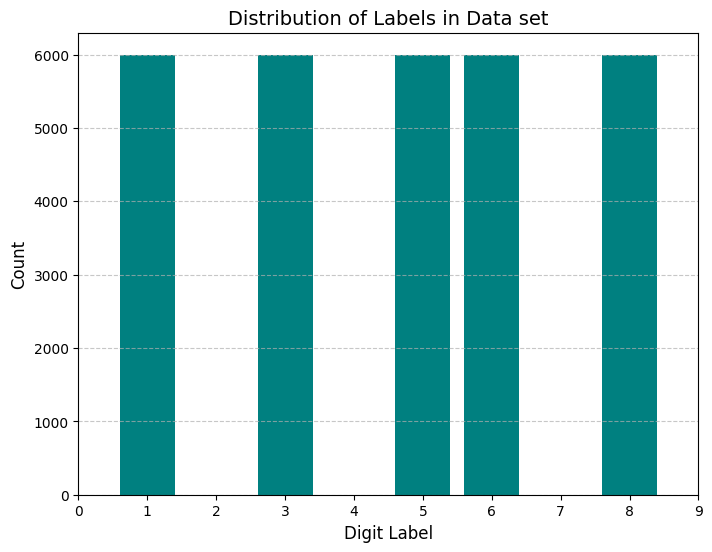

In [16]:
label_counts = df_train_filtered['label'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='teal')
plt.title('Distribution of Labels in Data set', fontsize=14)
plt.xlabel('Digit Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(10), labels=[str(i) for i in range(10)])
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.show()

## Image Visualization Utility Function

In [17]:
def show_image(data, num_samples=5, random_seed=None, indices=None):
    """
    Plot a grid of MNIST digit images with their labels.
    
    Args:
        data (pd.DataFrame): MNIST dataset with 'label' and pixel columns.
        num_samples (int): Number of samples to display (if indices not provided).
        random_seed (int, optional): Seed for reproducibility.
        indices (list, optional): Specific row indices to plot.
    """
    # Select indices to plot
    if indices is None:
        if random_seed is not None:
            np.random.seed(random_seed)
        indices = np.random.choice(data.index, size=num_samples, replace=False)
    else:
        num_samples = len(indices)
    
    samples = data.loc[indices]
    
    # Set up the plot
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 2, 2))
    if num_samples == 1:
        axes = [axes]  # Handle single plot case
    
    for i, (idx, row) in enumerate(samples.iterrows()):
        # Extract label and pixels
        label = row['label']
        pixels = row.drop('label').values  # 784 pixels
        image = pixels.reshape(28, 28)    # Reshape to 28x28
        
        # Plot the image
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

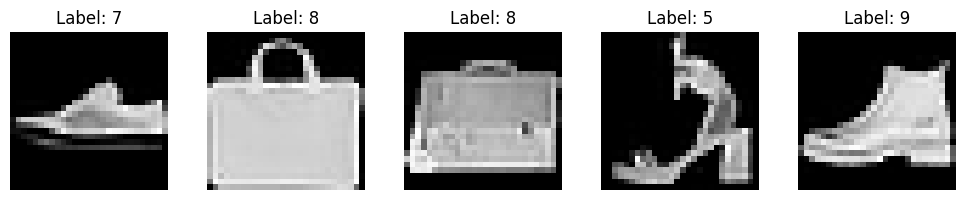

In [18]:
show_image(df_train , num_samples = 5 , random_seed = 42)

In [19]:
# Check pixels valuesit should be from 0 to 255
print("Min Pixel Value:", df_train_filtered.iloc[:, 1:].min().min()) 
print("Max Pixel Value:", df_train_filtered.iloc[:, 1:].max().max())

Min Pixel Value: 0
Max Pixel Value: 255


## Data Quality Checks

In this step, we check the filtered datasets for:
1. **Missing values** – to ensure no data is lost
2. **Duplicate rows** – to avoid bias or redundancy during training


In [20]:
# Make sure if there are any missing values
sum(df_train_filtered.isna().sum()),sum(df_test_filtered.isna().sum())

(0, 0)

In [21]:
# Make sure if there are any duplicats 
df_train_filtered.duplicated().sum(),df_test_filtered.duplicated().sum()

(18, 0)

The training dataset has 9 duplicates, and the testing dataset has 1 duplicate.


In [22]:
# Remove Duplicates

# Cleaning the Training Data
print(f"Duplicates found in Training: {df_train_filtered.duplicated().sum()}")
df_train_filtered.drop_duplicates(keep='first', inplace=True)
print(f"Duplicates remaining in Training: {df_train_filtered.duplicated().sum()}")

# Cleaning the Testing Data
print(f"Duplicates found in Testing: {df_test_filtered.duplicated().sum()}")
df_test_filtered.drop_duplicates(keep='first', inplace=True)
print(f"Duplicates remaining in Testing: {df_test_filtered.duplicated().sum()}")

# The DataFrames df_train_filtered and df_test_filtered are now cleaned and ready.

Duplicates found in Training: 18
Duplicates remaining in Training: 0
Duplicates found in Testing: 0
Duplicates remaining in Testing: 0


## Preparing Features and Labels


In [23]:
from sklearn.model_selection import train_test_split

X_train_val = df_train_filtered.drop(['label'], axis= 1)
y_train_val = df_train_filtered['label']

X_test = df_test_filtered.drop(['label'], axis= 1)
y_test = df_test_filtered['label']

## Normalizing Pixel Values


In [24]:
# Normalize the train data (this will scale the pixel values to range between 0 and 1)

X_train_val = X_train_val / 255.0
X_test = X_test / 255.0

## Splitting the Training Set into Training and Validation Sets

To evaluate the model during training, we split the filtered training dataset into:
- **Training set (80%)** – used to fit the model  
- **Validation set (20%)** – used to monitor performance and tune hyperparameters  

The `stratify` parameter ensures that class distributions are preserved
in both splits.


In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,      # The normalized features
    y_train_val,        # The labels
    test_size=0.2,     # 20% for validation
    random_state=42,   # Ensures the split is the same every time you run the code
    stratify=y_train_val # Crucial for keeping class balance across the split
)

print("--------------------------------------")
print(f"Training Features (X_train) shape: {X_train.shape}")
print(f"Validation Features (X_val) shape: {X_val.shape}")
print(f"Testing Features (X_test) shape: {X_test.shape}")


--------------------------------------
Training Features (X_train) shape: (23985, 784)
Validation Features (X_val) shape: (5997, 784)
Testing Features (X_test) shape: (5000, 784)


## Applying PCA for Dimensionality Reduction

Principal Component Analysis (PCA) is used to reduce the number of features
while preserving most of the variance in the data.  

- **Number of components**: 200  
- PCA is fitted on the training set and then applied to the validation and test sets.  

Reducing dimensionality can speed up training and may improve model performance.


In [26]:
from sklearn.decomposition import PCA

# number of components 
N_COMPONENTS = 200

pca = PCA(n_components=N_COMPONENTS, random_state=42)

# TRANSFORM the Training Data
X_train_pca = pca.fit_transform(X_train)

print(f"Original Training shape: {X_train.shape}")
print(f"PCA Training shape:      {X_train_pca.shape}")

# TRANSFORM the Validation and Testing Data
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"PCA Validation shape:    {X_val_pca.shape}")
print(f"PCA Testing shape:       {X_test_pca.shape}")

Original Training shape: (23985, 784)
PCA Training shape:      (23985, 200)
PCA Validation shape:    (5997, 200)
PCA Testing shape:       (5000, 200)


## Training the Logistic Regression Model


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluating the Logistic Regression Model


In [28]:
y_pred = model.predict(X_test_pca)
train_acc_lr = model.score(X_train_pca , y_train)
val_acc_lr = model.score(X_val_pca , y_val)
test_acc_lr = model.score(X_test_pca , y_test)
print(f"Training Accuracy : {train_acc_lr}")
print(f"Validarion Accuracy : {val_acc_lr}")
print(f"Testing Accuracy : {test_acc_lr}")

Training Accuracy : 0.9599749843652282
Validarion Accuracy : 0.9513089878272469
Testing Accuracy : 0.95


## Summary of Model Performance

The Logistic Regression model achieves high accuracy on all sets:
- **Training Accuracy:** ~96%  
- **Validation Accuracy:** ~95%  
- **Testing Accuracy:** ~95%  

This indicates that the model generalizes well and is not overfitting.


## Confusion Matrix

A **confusion matrix** is plotted to visualize the performance of the
Logistic Regression model on the test set.  

It shows the number of correct and incorrect predictions for each class,
helping to identify which classes are often misclassified.


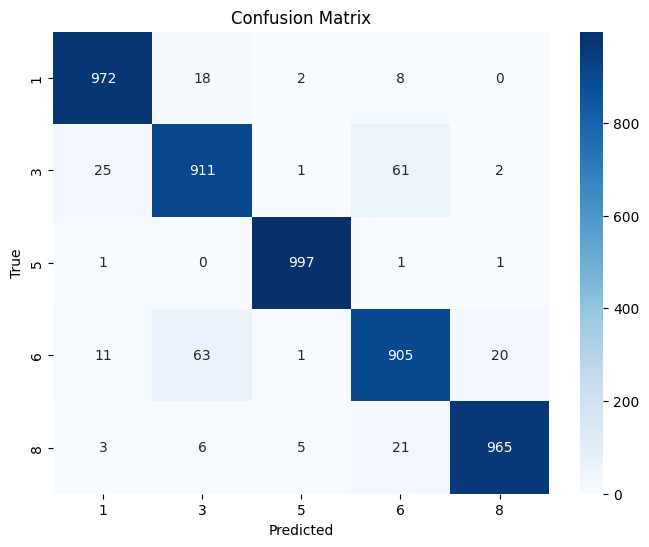

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASSES_TO_KEEP, yticklabels=CLASSES_TO_KEEP)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Detailed Classification Report

The classification report provides a comprehensive evaluation of the
Logistic Regression model on the test set, including:
- **Precision** – proportion of correct positive predictions  
- **Recall** – proportion of actual positives correctly identified  
- **F1-score** – harmonic mean of precision and recall  
- **Support** – number of samples for each class


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97      1000
           3       0.91      0.91      0.91      1000
           5       0.99      1.00      0.99      1000
           6       0.91      0.91      0.91      1000
           8       0.98      0.96      0.97      1000

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



## ROC-AUC Score

The ROC-AUC (Receiver Operating Characteristic – Area Under Curve) score measures the ability of the model to distinguish between classes.  


In [31]:
from sklearn.metrics import roc_auc_score
# y_prob: shape = (n_samples, n_classes)
y_prob = model.predict_proba(X_test_pca)

roc_auc = roc_auc_score(y_test, y_prob, average="macro", multi_class="ovo")
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.99475645


## K-Means Clustering for Fashion-MNIST

We apply **K-Means clustering** on the selected 5 classes of Fashion-MNIST.  

- `NUM_CLUSTERS = 5`: We choose 5 clusters to match the number of classes.  
- Each cluster is mapped to the **majority class label** of the samples inside it.  
- This allows us to convert the **unsupervised cluster assignments** into predicted class labels.  

The `train_kmeans` function:
1. Fits K-Means on the feature matrix `X`.
2. Assigns each cluster the label of the majority class within it.
3. Returns the fitted K-Means object and the cluster-to-class mapping.


In [32]:
# Your chosen 5 Fashion-MNIST classes
CLASSES_TO_KEEP = [ 1, 3, 5, 6, 8]

CLASS_NAMES_5 = {
    1: "Trouser",
    3: "Dress",
    5: "Sandal",
    6: "Shirt",
    8: "Bag"
}

NUM_CLUSTERS = 5

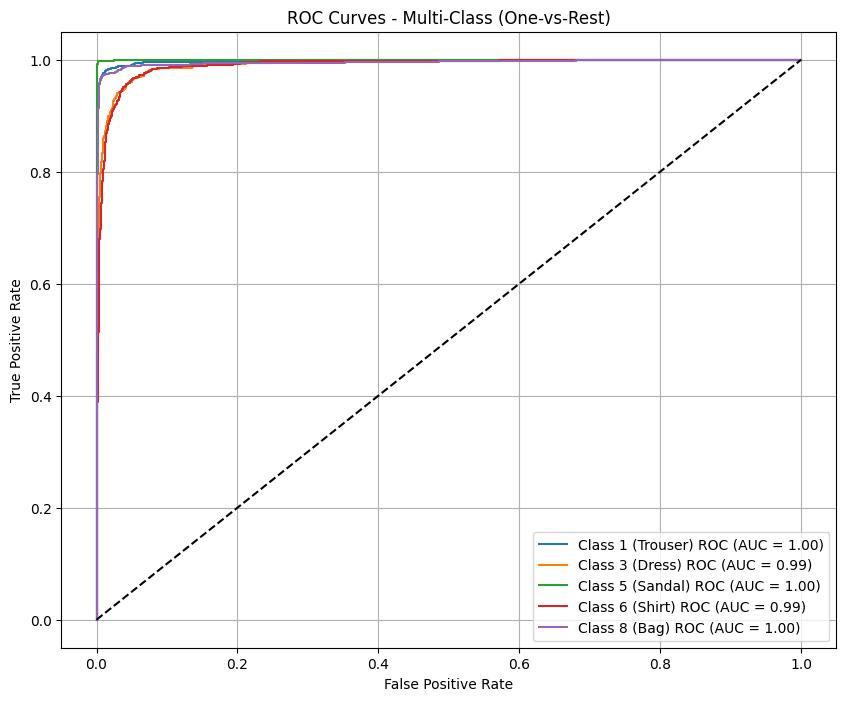

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=CLASSES_TO_KEEP)
y_prob = model.predict_proba(X_test_pca)

plt.figure(figsize=(10,8))

for i, cls in enumerate(CLASSES_TO_KEEP):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_prob[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} ({CLASS_NAMES_5[cls]}) ROC (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Multi-Class (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

def train_kmeans(X, y, k=5):
    """
    Fit K-Means on the training data and map each cluster
    to the majority class label inside it.
    """
    print(f"Training K-Means (k={k})...")

    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto",
        max_iter=100
    )
    kmeans.fit(X)

    cluster_ids = kmeans.labels_
    mapping = {}

    for cid in range(k):
        # Samples inside this cluster
        points = (cluster_ids == cid)

        # Majority label for the selected classes
        majority = mode(y[points], keepdims=True)[0][0]
        mapping[cid] = majority

        print(f"Cluster {cid} → Label {majority} ({CLASS_NAMES_5[majority]})")

    return kmeans, mapping

In [35]:
kmeans, mapping = train_kmeans(X_train_pca, y_train)

Training K-Means (k=5)...
Cluster 0 → Label 1 (Trouser)
Cluster 1 → Label 8 (Bag)
Cluster 2 → Label 5 (Sandal)
Cluster 3 → Label 6 (Shirt)
Cluster 4 → Label 3 (Dress)


### Visualizing Reconstructed Cluster Centers

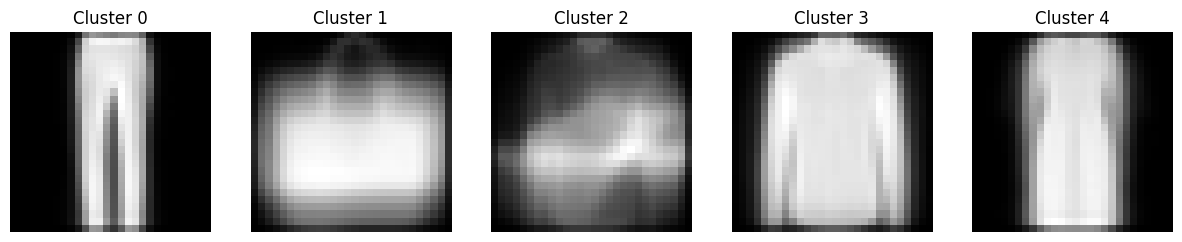

In [36]:
fig, axes = plt.subplots(1, NUM_CLUSTERS, figsize=(15, 3))

for i, center in enumerate(kmeans.cluster_centers_):
    original_center = pca.inverse_transform(center)
    
    axes[i].imshow(original_center.reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Cluster {i}")
    axes[i].axis('off')

plt.show()

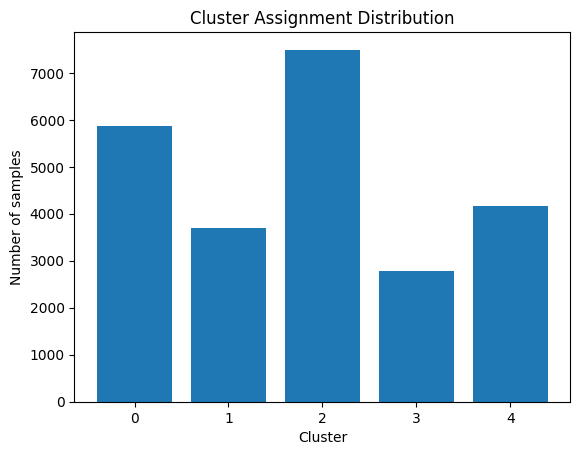

In [37]:
import numpy as np

cluster_counts = np.bincount(kmeans.labels_)
plt.bar(range(NUM_CLUSTERS), cluster_counts)
plt.xlabel("Cluster")
plt.ylabel("Number of samples")
plt.title("Cluster Assignment Distribution")
plt.show()


## Evaluation Function for K-Means

The `evaluate` function measures the performance of the K-Means model on a given dataset.  

**Steps performed:**
1. Predicts cluster IDs for the input features `X`.
2. Maps each cluster ID to its corresponding class label using the provided `mapping`.
3. Computes the **accuracy** by comparing predicted labels to true labels `y`.
4. Generates a **confusion matrix** for the selected classes (optional to print).

**Inputs:**
- `model`: Fitted K-Means object
- `mapping`: Cluster-to-class label mapping
- `X`: Features to evaluate
- `y`: True labels
- `title`: Optional string for display

**Outputs:**
- Accuracy score of the predictions

In [38]:
def evaluate(model, mapping, X, y, title="Evaluation"):
    print(f"\n--- {title} ---")

    # Predict cluster IDs
    cluster_pred = model.predict(X)

    # Convert cluster IDs → predicted labels
    y_pred = np.array([mapping[c] for c in cluster_pred])

    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred, labels=CLASSES_TO_KEEP)

    print(f"Accuracy: {acc:.4f}")
    # print("Confusion Matrix:")
    # print(cm)

    return acc


In [39]:
evaluate(kmeans, mapping, X_train_pca, y_train, "TRaining Set")


--- TRaining Set ---
Accuracy: 0.7123


0.7123202001250781

In [40]:
evaluate(kmeans, mapping, X_val_pca, y_val, "Validation Set")


--- Validation Set ---
Accuracy: 0.7122


0.712189428047357

In [41]:
test_acc_km = evaluate(kmeans, mapping, X_test_pca, y_test, "Test Set")



--- Test Set ---
Accuracy: 0.6988


**Observations:**
- The training and validation accuracies are very close (~0.712), suggesting the model is not overfitting.  
- The test accuracy (~0.699) is slightly lower, indicating some generalization gap.  
- Overall, K-Means captures a moderate structure in the data, but there is room for improvement, possibly by using supervised models like Logistic Regression.


## Comparison model results

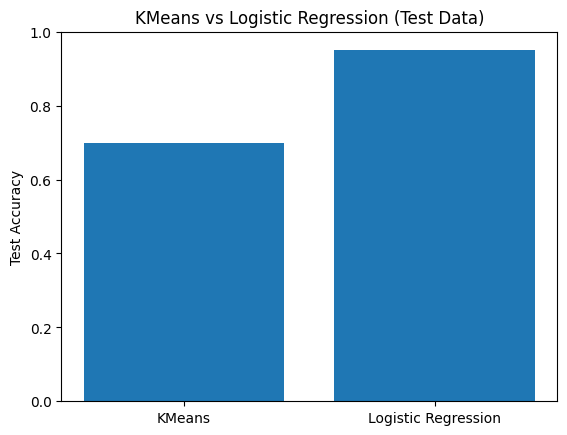

In [42]:
import matplotlib.pyplot as plt

models = ['KMeans', 'Logistic Regression']
accuracies = [test_acc_km, test_acc_lr]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel('Test Accuracy')
plt.title('KMeans vs Logistic Regression (Test Data)')
plt.ylim(0, 1)

plt.show()
